In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, AvgPool2D, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import plot_model
import pydot
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


In [2]:
testing_path = 'F:\\Research database\\Shrimp Recognition\\validating\\' 
training_path = 'F:\\Research database\\Shrimp Recognition\\training\\'
from keras.preprocessing.image import ImageDataGenerator
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

train_dataset = train_datagen.flow_from_directory(training_path,target_size = (224,224),batch_size = 16,)
test_dataset = test_datagen.flow_from_directory(testing_path,target_size = (224,224),batch_size = 16,)

""".fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
"""


Found 38042 images belonging to 4 classes.
Found 4681 images belonging to 4 classes.


'.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.\n.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.\n'

In [3]:
model = Sequential()
# 1st conv block
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 2),input_shape=(224,224,3), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(96, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(160, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))



# hidden layer
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
# output layer
model.add(Dense(4, activation='softmax'))
# compiling the sequential model
model.summary() 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 111, 111, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 96)          55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 160)        

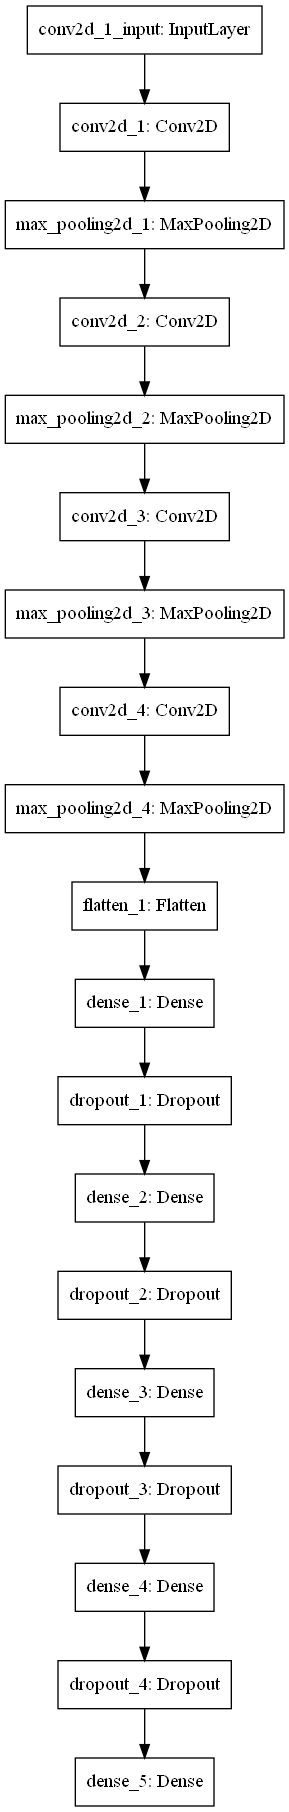

In [4]:
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
plot_model(model,to_file='model_3.png')

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Shrimp_model_4.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='max')

In [7]:
history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = 50,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(test_dataset),
    verbose=1,
    callbacks=[checkpoint,early],
    shuffle=True,
    workers = 5
)

Epoch 1/50
2378/2378 [==============================] - 81s 34ms/step - loss: 0.3331 - accuracy: 0.8618 - val_loss: 0.0931 - val_accuracy: 0.9139

Epoch 00001: val_accuracy improved from -inf to 0.91391, saving model to Shrimp_model_4.h5
Epoch 2/50
2378/2378 [==============================] - 84s 35ms/step - loss: 0.1415 - accuracy: 0.9540 - val_loss: 0.0288 - val_accuracy: 0.9517

Epoch 00002: val_accuracy improved from 0.91391 to 0.95172, saving model to Shrimp_model_4.h5
Epoch 3/50
2378/2378 [==============================] - 85s 36ms/step - loss: 0.0665 - accuracy: 0.9817 - val_loss: 2.8242e-04 - val_accuracy: 0.9727

Epoch 00003: val_accuracy improved from 0.95172 to 0.97266, saving model to Shrimp_model_4.h5
Epoch 4/50
2378/2378 [==============================] - 86s 36ms/step - loss: 0.0633 - accuracy: 0.9828 - val_loss: 0.0354 - val_accuracy: 0.9677

Epoch 00004: val_accuracy did not improve from 0.97266
Epoch 5/50
2378/2378 [==============================] - 87s 37ms/step - lo

2378/2378 [==============================] - 93s 39ms/step - loss: 0.0334 - accuracy: 0.9942 - val_loss: 0.0795 - val_accuracy: 0.8601

Epoch 00040: val_accuracy did not improve from 0.99017
Epoch 41/50
2378/2378 [==============================] - 92s 39ms/step - loss: 0.0389 - accuracy: 0.9920 - val_loss: 0.3396 - val_accuracy: 0.9876

Epoch 00041: val_accuracy did not improve from 0.99017
Epoch 42/50
2378/2378 [==============================] - 93s 39ms/step - loss: 0.0239 - accuracy: 0.9957 - val_loss: 0.0947 - val_accuracy: 0.9831

Epoch 00042: val_accuracy did not improve from 0.99017
Epoch 43/50
2378/2378 [==============================] - 90s 38ms/step - loss: 0.0360 - accuracy: 0.9955 - val_loss: 0.3256 - val_accuracy: 0.9816

Epoch 00043: val_accuracy did not improve from 0.99017
Epoch 44/50
2378/2378 [==============================] - 89s 37ms/step - loss: 0.1009 - accuracy: 0.9838 - val_loss: 2.0013e-05 - val_accuracy: 0.9744

Epoch 00044: val_accuracy did not improve from 0

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


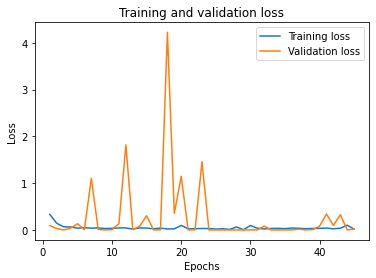

In [8]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig("Model_2_trainingVsvalidationLoss.jpeg")
plt.show()


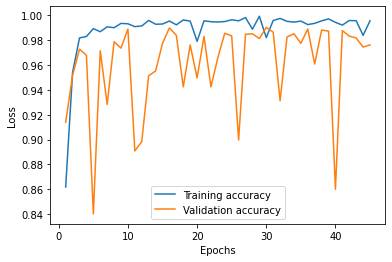

In [9]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
# plt.savefig("Model_1_trainingVsvalidationAccuracy.jpeg")
plt.show()

In [10]:
import pandas as pd 
his_df = pd.DataFrame(history_dict)

In [11]:
his_df.to_excel('model_4_history.xlsx',index=False)